In [1]:
import pandas as pd
df = pd.read_csv("Netflix.csv")
df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [3]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [4]:
df.drop_duplicates(inplace=True)

Task. 2) Is there any Null Value present in any column ? Show with Heat-map.

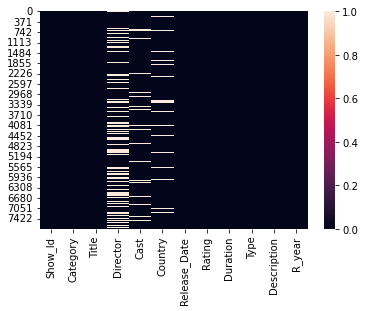

In [33]:
df.isnull().sum()
sns.heatmap(df.isnull())
plt.show()

Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [6]:
df[df.Title == "House of Cards"][["Show_Id", "Director"]]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [7]:
df.Release_Date = pd.to_datetime(df.Release_Date)

In [8]:
df["R_year"] = df.Release_Date.dt.year

In [9]:
df.groupby(by="R_year").count()["Show_Id"].sort_values(ascending=False).head(1)

R_year
2019.0    2153
Name: Show_Id, dtype: int64

In [10]:
df.R_year.value_counts().head(1)

2019.0    2153
Name: R_year, dtype: int64

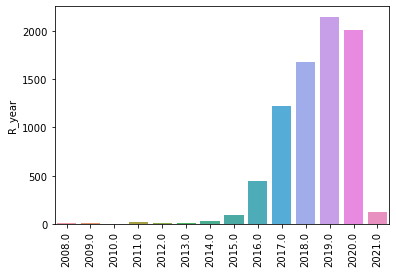

In [11]:
sns.barplot(y=df.R_year.value_counts(),x=df.R_year.value_counts().index)
plt.xticks(rotation=90)
plt.show()

Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

In [12]:
df.Category.value_counts()

Movie      5377
TV Show    2410
Name: Category, dtype: int64

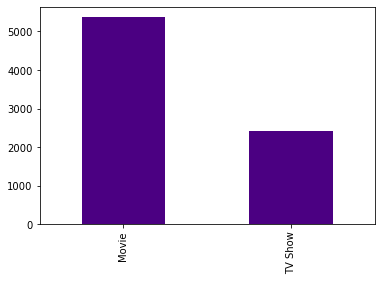

In [32]:
df.Category.value_counts().plot(kind="bar", color = "indigo")
plt.show()

Q. 4) Show all the Movies that were released in year 2000.

In [14]:
df[(df.Release_Date.dt.year == 2000) & (df.Category == "Movie")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,R_year


Q. 5) Show only the Titles of all TV Shows that were released in India only.

In [15]:
df[df.Country == "India"]["Title"]

8                            706
9                           1920
18                        15-Aug
20          ​​Kuch Bheege Alfaaz
21                  ​Goli Soda 2
                  ...           
7766                        Zero
7771    Zindagi Na Milegi Dobara
7778                    Zokkomon
7782                         Zoo
7785                      Zubaan
Name: Title, Length: 923, dtype: object

Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [16]:
df[df.Category == "Movie"]["Director"].value_counts()

Raúl Campos, Jan Suter           18
Marcus Raboy                     15
Jay Karas                        14
Cathy Garcia-Molina              13
Youssef Chahine                  12
                                 ..
Elle Callahan                     1
Ana Kokkinos                      1
Timo Tjahjanto, Kimo Stamboel     1
Kelly Noonan                      1
Sam Dunn                          1
Name: Director, Length: 3909, dtype: int64

In [17]:
df[df.Category == "TV Show"]["Director"].value_counts()

Alastair Fothergill    3
Shin Won-ho            2
Iginio Straffi         2
Rob Seidenglanz        2
Stan Lathan            2
                      ..
Neslihan Yesilyurt     1
Danny Cannon           1
Ah Loong               1
Eli Roth               1
Lee Toland Krieger     1
Name: Director, Length: 178, dtype: int64

Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [18]:
df[(df.Category == "Movie") & (df.Type.str.contains("Comedies")) | (df.Country.str.contains("United Kingdom"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,R_year
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019.0
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019.0
36,s37,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,2019-06-01,TV-MA,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ...",2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7774,s7773,Movie,Zipi & Zape y la Isla del Capitan,Oskar Santos,"Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...",Spain,2017-07-01,TV-PG,105 min,"Children & Family Movies, Comedies","At Christmas, Zip and Zap take a trip with the...",2017.0
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0


Q. 8) In how many movies/shows, Tom Cruise was cast ?

In [19]:
len(df[df.Cast.fillna("a").str.contains("Tom Cruise")])

2

Q. 9) What are the different Ratings defined by Netflix ?

In [20]:
df.Rating.value_counts().index

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y', 'TV-Y7', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17'],
      dtype='object')

Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?

In [21]:
len(df[(df.Rating == "TV-14") & (df.Country == "Canada")])

23

Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?

In [22]:
len(df[(df.Rating == "R") & (df.R_year > 2018)])

450

Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

In [23]:
df[df.Category == "Movie"].Duration.str[:-4].max()

'99'

Q. 11) Which individual country has the Highest No. of TV Shows ?

In [24]:
df[df.Category == "TV Show"]["Country"].value_counts().head()

United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Name: Country, dtype: int64

Q. 12) How can we sort the dataset by Year ?

In [25]:
df.sort_values(by="R_year")

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,R_year
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008.0
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN


Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.